# Obtencion y Limpieza Airbnb e incidendia delictiva 

In [1]:
import pandas as pd
import numpy as np
import requests
from zipfile import ZipFile
import os
pd.options.display.max_columns = None

### Obtención y limpieza

In [5]:
# Validamos o creamos el directorio de datos
if os.path.exists("./data") == False:
    print("Creando directorio de datos")
    os.mkdir("data")

# nombre csv delicuencia original
nombre_csv_delincuencia = "./data/mensual_conteos_delitos_alcaldias.csv"

# validamos si existe el archivo o hacemos la descarga 
if os.path.exists(nombre_csv_delincuencia) == False:
    # Link descarga reporte de seguridad
    url_serguridad =  "https://datosseguridad.cdmx.gob.mx/tablero/assets/data/analisis_geo.zip"
    print("Descargando archivo zip... \n")
    r = requests.get(url_serguridad)
    zip_name = "./data/dataSeguridad.zip"
    with open(zip_name, "wb") as code:
        code.write(r.content)
    with ZipFile(zip_name, 'r') as zip:
        # imprimimos el contenido del archivo zip
        zip.printdir()
        # extraemos todos los archivos del zip
        print('Extrayendo archivos...')
        zip.extractall("./data")
        print('Listo! \n') 

# nombre csv datos airbnb
nombre_csv_airbnb = "./data/DataCdmx.csv"
# validamos si existe el archivo o realizamos la descarga y guardado
if os.path.exists(nombre_csv_airbnb) == False:
    # Link descarga airbnb
    url_airbnb = "http://data.insideairbnb.com/mexico/df/mexico-city/2020-10-26/visualisations/listings.csv"
    print("Desgargando datos Airbnb.... \n")
    df_descargado = pd.read_csv(url_airbnb)
    df_descargado.to_csv(nombre_csv_airbnb, index=False)


Descargando archivo zip... 

File Name                                             Modified             Size
mensual_conteos_delitos_alcaldias.csv          2020-09-12 10:41:52      1604049
__MACOSX/._mensual_conteos_delitos_alcaldias.csv 2020-09-12 10:41:52          511
tendencias_fiebre_alcaldias.csv                2020-09-12 10:42:30      1028685
__MACOSX/._tendencias_fiebre_alcaldias.csv     2020-09-12 10:42:30          505
mensual_conteos_delitos.csv                    2020-09-12 10:41:52        71912
__MACOSX/._mensual_conteos_delitos.csv         2020-09-12 10:41:52          501
Extrayendo archivos...
Listo! 



#### Limpieza datos Airbnb

In [157]:
df = pd.read_csv(nombre_csv_airbnb)
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,4194,1,0,NaN,NaN,1,363
1,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41006,-99.17645,Entire home/apt,8429,1,48,2020-10-13,0.44,10,359
2,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,NaN,Cuauhtémoc,19.41259,-99.17959,Private room,1253,2,52,2019-11-03,1.43,2,180
3,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,NaN,Cuauhtémoc,19.41375,-99.17028,Entire home/apt,1983,4,39,2019-02-24,0.36,2,365
4,70644,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,NaN,Coyoacán,19.35601,-99.16167,Entire home/apt,1232,10,102,2020-03-09,0.96,3,167


In [158]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.918000e+04,1.918000e+04,0.0,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,14134.000000,19180.000000,19180.000000
mean,3.046036e+07,1.331505e+08,NaN,19.397983,-99.167840,1195.640876,4.199531,23.723358,1.308724,5.682377,249.105944
std,1.183094e+07,1.039258e+08,NaN,0.046724,0.036172,4488.506221,19.081281,43.423214,1.551479,11.688273,121.943773
min,3.579700e+04,7.365000e+03,NaN,19.169140,-99.339630,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,2.155190e+07,4.270039e+07,NaN,19.371560,-99.180520,382.000000,1.000000,0.000000,0.270000,1.000000,148.000000
50%,3.269988e+07,1.105059e+08,NaN,19.410425,-99.167855,661.000000,2.000000,5.000000,0.790000,2.000000,299.000000
75%,4.086447e+07,2.137413e+08,NaN,19.430700,-99.152450,1153.000000,2.000000,27.000000,1.810000,5.000000,364.000000
max,4.605624e+07,3.732781e+08,NaN,19.557340,-98.962970,350000.000000,1000.000000,556.000000,27.350000,108.000000,365.000000


In [159]:
# Eliminamos la columna "neighbourhood_group" ya que cuenta con puros valores nulos
# Eliminamos tambien la columna "id" que es un indice original que no aporta información útil
df_airbnb_clean = df.drop(columns=["neighbourhood_group","id"])

# Convertimos el valor de last_review a datetime
df_airbnb_clean["last_review"] = pd.to_datetime(df_airbnb_clean["last_review"])

print("Valores perdidos: ")
print(df_airbnb_clean.isnull().sum())

# Obtenemos solo los valores que tienen fecha de "last_review" ya que esta nos indica que ah sido
# rentado al menos una vez, esto tambien se ve reflejado en la columna "reviews_per_month" 
# asi eliminarlo en base a solo una es suficiente.
df_airbnb_clean = df_airbnb_clean.loc[df_airbnb_clean["last_review"].isnull() == False]

# Tambien eliminamos dos datos perdido que tenemos de la columna "name" para que no generen ruido
# son solo dos registros
df_airbnb_clean = df_airbnb_clean.loc[df_airbnb_clean["name"].isnull() == False]

# Por ultimo eliminamos los valores perdidos de host_name que son dos tambien
df_airbnb_clean = df_airbnb_clean.loc[df_airbnb_clean["host_name"].isnull() == False]

# Tambien pudimos hacerlo de una manera mas sencilla dado que los valores faltantes 
# son muy pocos en el caso de "name" y "host_name" y los de la otras columnas no aportan
# para este analisis
print("\n\n")
print(df_airbnb_clean.isnull().sum())

Valores perdidos: 
name                                 5
host_id                              0
host_name                            2
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5046
reviews_per_month                 5046
calculated_host_listings_count       0
availability_365                     0
dtype: int64



name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month      

In [160]:
df_airbnb_clean.dtypes

name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

#### Limpieza datos delicuencia

Para este analisis, el tratado de los datos de conteo mensual de delitos por alcaldia sera un poco distinto ya que solo obtendremos el acumulado del año 2020 y por tipo de delito por alcaldia para hacer el cruce con la base de Airbnb 

In [161]:
df_delitos = pd.read_csv(nombre_csv_delincuencia)
df_delitos.head(5)

,acumulado,acumulado_anterior,acumulado_2018,acumulado_2019,acumulado_2020,color_cambio_acumulado_2019_2020,cambio_acumulado_2019_2020,cambio_acumulado_vs_acumulado_anterior,cambio_mes_tot_vs_diciembre_tot,cambio_mes_tot_vs_mes_year_anterior_tot,cambio_mes_vs_mes_anterior,cambio_prom_cambio_anual,cambio_promedio_year_actual,cambio_promedio_year_anterior,color_cambio_acumulado_vs_acumulado_anterior,color_cambio_mes_tot_vs_diciembre_tot,color_cambio_mes_tot_vs_mes_year_anterior_tot,color_cambio_mes_vs_mes_ant,color_cambio_prom_cambio_anual,color_cambio_promedio_year_actual,color_cambio_promedio_year_anterior,diciembre_tot,id_delito_general,cve_delito,mes,mes_anterior_tot,mes_tot,mes_year_anterior_tot,year,geo_alcaldia,nomgeo
0,11.0,14.0,41.0,24.0,38.0,5.0,58.333333,-21.428571,20.000000,-33.333333,20.000000,-43.401106,0.228968,0.404545,2.0,6.0,2.0,6.0,2.0,6.0,6.0,5.0,1,Homicidio doloso,1,5.0,6.0,9.0,2019,9006,Iztacalco
1,54.0,NaN,41.0,24.0,38.0,5.0,58.333333,NaN,20.000000,0.000000,-25.000000,-43.401106,0.228968,0.404545,0.0,6.0,0.0,2.0,2.0,6.0,6.0,5.0,1,Homicidio doloso,1,8.0,6.0,6.0,2020,9006,Iztacalco
2,19.0,7.0,37.0,38.0,30.0,3.0,-21.052632,171.428571,11.111111,233.333333,11.111111,-281.936920,-0.231633,0.127315,6.0,4.0,6.0,4.0,1.0,2.0,6.0,9.0,10,Lesiones dolosas por disparo de arma de fuego,1,9.0,10.0,3.0,2019,9006,Iztacalco
3,68.0,NaN,37.0,38.0,30.0,3.0,-21.052632,NaN,-44.444444,-50.000000,0.000000,-281.936920,-0.231633,0.127315,0.0,2.0,1.0,0.0,1.0,2.0,6.0,9.0,10,Lesiones dolosas por disparo de arma de fuego,1,5.0,5.0,10.0,2020,9006,Iztacalco
4,194.0,133.0,906.0,677.0,316.0,1.0,-53.323486,45.864662,-16.981132,-12.871287,-16.981132,-561.921789,0.022644,-0.004902,4.0,2.0,3.0,3.0,1.0,4.0,2.0,106.0,11,Robo a transeúnte en vía pública,1,106.0,88.0,101.0,2019,9006,Iztacalco


In [162]:
# obtenemos solo los del año 2020
df_delitos_clean = df_delitos.query("year == 2020")

# Agrupamos por nombre de alcaldia y tipo de delito
# hacemos la agregacion por el maximo de acumulado_2020 ya que es el mismo valor en todos
df_delitos_clean= df_delitos_clean.groupby(["nomgeo","cve_delito"]).agg({"acumulado_2020":"max"}).reset_index()

# Hacemos un pivoteo para acomodar nuestro dataframe para hacer el merge de una manera mas sencilla
df_delitos_clean = df_delitos_clean.pivot(index='nomgeo', columns='cve_delito', values='acumulado_2020').reset_index()

In [163]:
df_delitos_clean.head(20)

cve_delito,nomgeo,Homicidio doloso,Lesiones dolosas por disparo de arma de fuego,Robo a bordo de Metrobús,Robo a casa habitación con violencia,Robo a casa habitación sin violencia,Robo a conductor/pasajero de vehículo,Robo a cuentahabiente,Robo a negocio con violencia,Robo a pasajero a bordo de microbús,Robo a pasajero a bordo de taxi,Robo a pasajero a bordo del Metro,Robo a repartidor,Robo a transeúnte en vía pública,Robo a transportista,Robo de vehículo con violencia,Robo de vehículo sin violencia,Total delitos alto impacto,Total delitos bajo impacto
0,Azcapotzalco,36.0,31.0,2.0,27.0,113.0,137.0,14.0,75.0,15.0,7.0,17.0,114.0,319.0,9.0,127.0,213.0,1039.0,252.0
1,Benito Juárez,17.0,19.0,29.0,17.0,151.0,114.0,16.0,58.0,6.0,9.0,72.0,45.0,393.0,0.0,134.0,371.0,1190.0,294.0
2,Coyoacán,28.0,22.0,4.0,20.0,204.0,35.0,12.0,44.0,17.0,22.0,16.0,39.0,357.0,0.0,139.0,485.0,1253.0,243.0
3,Cuajimalpa de Morelos,9.0,4.0,0.0,12.0,47.0,10.0,3.0,17.0,1.0,1.0,0.0,5.0,43.0,0.0,8.0,40.0,156.0,57.0
4,Cuauhtémoc,81.0,45.0,140.0,24.0,275.0,148.0,23.0,101.0,6.0,32.0,165.0,90.0,881.0,2.0,66.0,284.0,1932.0,563.0
5,Gustavo A. Madero,119.0,97.0,38.0,36.0,283.0,106.0,33.0,160.0,45.0,32.0,34.0,179.0,646.0,15.0,370.0,498.0,2380.0,427.0
6,Iztacalco,38.0,30.0,19.0,14.0,111.0,89.0,11.0,55.0,59.0,17.0,32.0,81.0,316.0,2.0,111.0,229.0,1027.0,219.0
7,Iztapalapa,176.0,159.0,11.0,70.0,333.0,321.0,26.0,278.0,132.0,136.0,40.0,396.0,1257.0,12.0,554.0,796.0,4212.0,665.0
8,La Magdalena Contreras,12.0,10.0,0.0,9.0,55.0,13.0,2.0,26.0,1.0,2.0,0.0,18.0,86.0,0.0,35.0,98.0,312.0,68.0
9,Miguel Hidalgo,28.0,16.0,1.0,18.0,133.0,147.0,33.0,109.0,11.0,27.0,47.0,108.0,565.0,1.0,71.0,198.0,1286.0,281.0


In [164]:
# renombramos la columna en ambos dataframes para hacer el merge
df_airbnb_clean = df_airbnb_clean.rename(columns={'neighbourhood':'alcaldia'})
df_delitos_clean = df_delitos_clean.rename(columns={'nomgeo': 'alcaldia'})

In [165]:
#realizamos el merge y generamos nuestro nuevo dataframe
df_result = df_airbnb_clean.merge(df_delitos_clean, on="alcaldia")
df_result.head()

,name,host_id,host_name,alcaldia,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Homicidio doloso,Lesiones dolosas por disparo de arma de fuego,Robo a bordo de Metrobús,Robo a casa habitación con violencia,Robo a casa habitación sin violencia,Robo a conductor/pasajero de vehículo,Robo a cuentahabiente,Robo a negocio con violencia,Robo a pasajero a bordo de microbús,Robo a pasajero a bordo de taxi,Robo a pasajero a bordo del Metro,Robo a repartidor,Robo a transeúnte en vía pública,Robo a transportista,Robo de vehículo con violencia,Robo de vehículo sin violencia,Total delitos alto impacto,Total delitos bajo impacto
0,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41006,-99.17645,Entire home/apt,8429,1,48,2020-10-13,0.44,10,359,81.0,45.0,140.0,24.0,275.0,148.0,23.0,101.0,6.0,32.0,165.0,90.0,881.0,2.0,66.0,284.0,1932.0,563.0
1,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtémoc,19.41259,-99.17959,Private room,1253,2,52,2019-11-03,1.43,2,180,81.0,45.0,140.0,24.0,275.0,148.0,23.0,101.0,6.0,32.0,165.0,90.0,881.0,2.0,66.0,284.0,1932.0,563.0
2,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.41375,-99.17028,Entire home/apt,1983,4,39,2019-02-24,0.36,2,365,81.0,45.0,140.0,24.0,275.0,148.0,23.0,101.0,6.0,32.0,165.0,90.0,881.0,2.0,66.0,284.0,1932.0,563.0
3,"Huge Luxurious Suite 70's style, perfectly loc...",36836,Roberto,Cuauhtémoc,19.42390,-99.16890,Entire home/apt,1584,3,35,2019-11-18,0.34,1,365,81.0,45.0,140.0,24.0,275.0,148.0,23.0,101.0,6.0,32.0,165.0,90.0,881.0,2.0,66.0,284.0,1932.0,563.0
4,Colorful and spacious Apt. Family favorite,899360,Julian,Cuauhtémoc,19.41057,-99.17730,Entire home/apt,1159,3,97,2019-09-29,0.89,3,113,81.0,45.0,140.0,24.0,275.0,148.0,23.0,101.0,6.0,32.0,165.0,90.0,881.0,2.0,66.0,284.0,1932.0,563.0


In [166]:
# Guardamos el dataset limpio
df_result.to_csv("data_result.csv",index=False)

In [167]:

df_result.sort_values(by="price", ascending=False)

,name,host_id,host_name,alcaldia,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Homicidio doloso,Lesiones dolosas por disparo de arma de fuego,Robo a bordo de Metrobús,Robo a casa habitación con violencia,Robo a casa habitación sin violencia,Robo a conductor/pasajero de vehículo,Robo a cuentahabiente,Robo a negocio con violencia,Robo a pasajero a bordo de microbús,Robo a pasajero a bordo de taxi,Robo a pasajero a bordo del Metro,Robo a repartidor,Robo a transeúnte en vía pública,Robo a transportista,Robo de vehículo con violencia,Robo de vehículo sin violencia,Total delitos alto impacto,Total delitos bajo impacto
8628,Room in the most exclusive area in Mexico City,88593780,Oscar,Miguel Hidalgo,19.44412,-99.20237,Private room,208750,1,3,2019-12-13,0.23,1,89,28.0,16.0,1.0,18.0,133.0,147.0,33.0,109.0,11.0,27.0,47.0,108.0,565.0,1.0,71.0,198.0,1286.0,281.0
7744,Amazing Penthouse in Polanco.,55605035,Luz,Miguel Hidalgo,19.43825,-99.19953,Entire home/apt,167000,7,12,2018-06-03,0.38,2,201,28.0,16.0,1.0,18.0,133.0,147.0,33.0,109.0,11.0,27.0,47.0,108.0,565.0,1.0,71.0,198.0,1286.0,281.0
487,Charming 1900's House for Events,5974590,Chris,Cuauhtémoc,19.40176,-99.16663,Entire home/apt,108848,1,2,2017-05-28,0.04,8,364,81.0,45.0,140.0,24.0,275.0,148.0,23.0,101.0,6.0,32.0,165.0,90.0,881.0,2.0,66.0,284.0,1932.0,563.0
13578,Hermoso Depto. en Santa Fe con Servicios Hotel...,198926402,City Express Suites Santa Fe,Cuajimalpa de Morelos,19.36031,-99.27903,Entire home/apt,100000,1,2,2018-10-27,0.08,1,365,9.0,4.0,0.0,12.0,47.0,10.0,3.0,17.0,1.0,1.0,0.0,5.0,43.0,0.0,8.0,40.0,156.0,57.0
277,Suite Room in Condesa @CasaNuevoLeon /1,30541688,Diana,Cuauhtémoc,19.41193,-99.17311,Private room,73062,1,7,2015-08-25,0.11,12,363,81.0,45.0,140.0,24.0,275.0,148.0,23.0,101.0,6.0,32.0,165.0,90.0,881.0,2.0,66.0,284.0,1932.0,563.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,Linda habitación privada en el sur. (Only women),81010801,Joshafat,Coyoacán,19.32671,-99.13456,Private room,186,2,6,2019-11-30,0.34,2,179,28.0,22.0,4.0,20.0,204.0,35.0,12.0,44.0,17.0,22.0,16.0,39.0,357.0,0.0,139.0,485.0,1253.0,243.0
6815,HABITACIÓN COMPARTIDA CON CHICO CERCA INP Y UNAM,74011866,Valentin,Coyoacán,19.30911,-99.17297,Private room,176,1,1,2020-10-04,1.00,6,359,28.0,22.0,4.0,20.0,204.0,35.0,12.0,44.0,17.0,22.0,16.0,39.0,357.0,0.0,139.0,485.0,1253.0,243.0
130,Casa con dos dormitorios 9 personas,8539814,Bernardo,Cuauhtémoc,19.41798,-99.17052,Entire home/apt,170,1,33,2019-11-23,0.45,7,365,81.0,45.0,140.0,24.0,275.0,148.0,23.0,101.0,6.0,32.0,165.0,90.0,881.0,2.0,66.0,284.0,1932.0,563.0
13437,"Habitación privada, gradable condominio iluminado",371681064,Martha,Álvaro Obregón,19.38712,-99.19439,Private room,170,1,1,2020-10-23,1.00,2,0,49.0,51.0,8.0,44.0,177.0,180.0,34.0,154.0,16.0,83.0,5.0,193.0,554.0,0.0,159.0,302.0,1721.0,365.0


<AxesSubplot:>

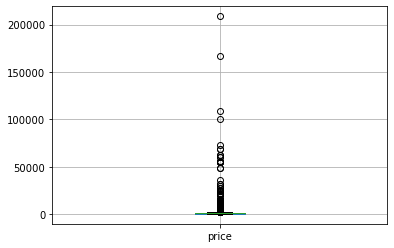

In [168]:
df_result.boxplot(column="price")